In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import numpy as np


In [9]:
def create_qutrit_plus_state(circuit, qubits):
    theta = 2 * np.arccos(1 / np.sqrt(3))
    phi = np.pi / 2

    circuit.reset(qubits[0])
    circuit.reset(qubits[1])

    # Zastosuj bramkę Ry na pierwszym qubicie
    circuit.ry(theta, qubits[0])
    # Zastosuj bramkę Rz na pierwszym qubicie
    circuit.rz(phi, qubits[0])
    # Zastosuj bramkę Ry na drugim qubicie z kątem pi/2
    circuit.ry(np.pi/2, qubits[1])
    # Zastosuj bramkę kontrolowaną (np. bramka kontrolowana faza)
    circuit.crz(np.pi, qubits[0], qubits[1])



In [10]:
# Tworzymy rejestr kwantowy z 6 qubitami
qreg = QuantumRegister(6, 'q')
# Tworzymy rejestr klasyczny do pomiarów
creg = ClassicalRegister(6, 'c')
# Tworzymy obwód kwantowy
circuit = QuantumCircuit(qreg, creg)


In [11]:
# Zastosowanie operacji na każdym qutricie
create_qutrit_plus_state(circuit, [qreg[0], qreg[1]])  # Qutrit 1
create_qutrit_plus_state(circuit, [qreg[2], qreg[3]])  # Qutrit 2
create_qutrit_plus_state(circuit, [qreg[4], qreg[5]])  # Qutrit 3


In [12]:
# Dodajemy pomiary
circuit.measure(qreg, creg)


In [15]:
print("Wyniki pomiarów (posortowane według bitów):")
for outcome in sorted(counts):
    print(f"{outcome} : {counts[outcome]}")

# Wyświetlamy wyniki posortowane według liczby wystąpień
print("\nWyniki pomiarów (posortowane według liczby wystąpień):")
for outcome, count in sorted(counts.items(), key=lambda item: item[1], reverse=True):
    print(f"{outcome} : {count}")

Wyniki pomiarów (posortowane według bitów):
000000 : 3
000001 : 9
000010 : 5
000011 : 16
000100 : 8
000101 : 19
000110 : 9
000111 : 13
001000 : 3
001001 : 5
001010 : 3
001011 : 13
001100 : 16
001101 : 16
001110 : 12
001111 : 18
010000 : 10
010001 : 25
010010 : 12
010011 : 26
010100 : 20
010101 : 39
010110 : 18
010111 : 43
011000 : 5
011001 : 25
011010 : 12
011011 : 22
011100 : 22
011101 : 47
011110 : 21
011111 : 37
100000 : 6
100001 : 6
100010 : 3
100011 : 5
100100 : 5
100101 : 31
100110 : 9
100111 : 13
101000 : 5
101001 : 7
101010 : 1
101011 : 5
101100 : 11
101101 : 28
101110 : 6
101111 : 19
110000 : 7
110001 : 14
110010 : 8
110011 : 15
110100 : 19
110101 : 39
110110 : 19
110111 : 30
111000 : 13
111001 : 17
111010 : 9
111011 : 13
111100 : 17
111101 : 42
111110 : 17
111111 : 33

Wyniki pomiarów (posortowane według liczby wystąpień):
011101 : 47
010111 : 43
111101 : 42
110101 : 39
010101 : 39
011111 : 37
111111 : 33
100101 : 31
110111 : 30
101101 : 28
010011 : 26
011001 : 25
010001 : 25

In [16]:
# Wyświetlamy tylko stany bez '11' w parach qubitów
print("Wyniki pomiarów (filtrowane i posortowane):")
for outcome, count in sorted(counts.items(), key=lambda item: item[1], reverse=True):
    # Sprawdzamy każdą parę bitów
    valid = True
    bits = outcome[::-1]  # Odwracamy ciąg, ponieważ Qiskit używa małego endian
    for i in range(0, 6, 2):
        if bits[i:i+2] == '11':
            valid = False
            break
    if valid:
        print(f"{outcome} : {count}")


Wyniki pomiarów (filtrowane i posortowane):
010101 : 39
100101 : 31
011001 : 25
010001 : 25
010100 : 20
000101 : 19
010110 : 18
011010 : 12
010010 : 12
010000 : 10
100110 : 9
000110 : 9
000001 : 9
000100 : 8
101001 : 7
100001 : 6
100000 : 6
000010 : 5
100100 : 5
011000 : 5
001001 : 5
101000 : 5
100010 : 3
001010 : 3
001000 : 3
000000 : 3
101010 : 1


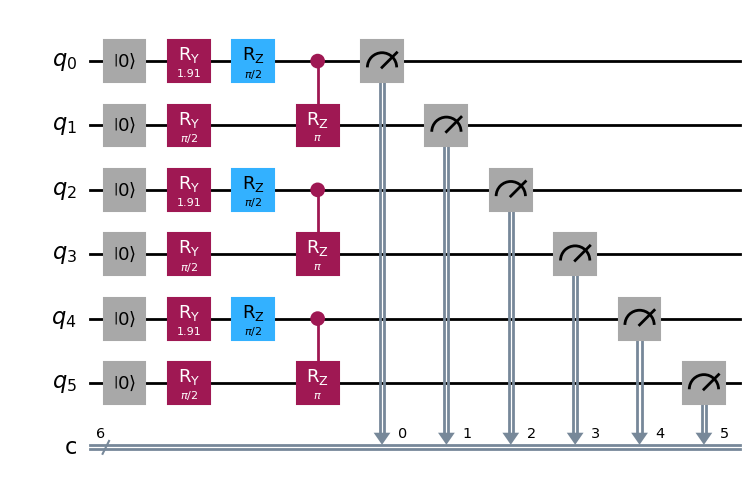

In [14]:
circuit.draw('mpl')